# Import Labelers

In [1]:
# --- Essential Libraries ---

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import warnings

# Machine Learning Libraries
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

from catboost import CatBoostClassifier
from category_encoders import TargetEncoder
from collections import Counter

# Deep Learning Libraries
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping

# Settings
warnings.filterwarnings('ignore')  # Suppress warnings for clean output

# Set random seeds for reproducibility
SEED = 42
np.random.seed(SEED)
random.seed(SEED)
tf.random.set_seed(SEED)

# Load Data

In [2]:
# Load dataset
df = pd.read_csv('/kaggle/input/depression-surveydataset-for-analysis/final_depression_dataset_1.csv')

In [3]:
df

,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Pooja,Female,37,Ghaziabad,Working Professional,Teacher,NaN,2.0,NaN,NaN,4.0,7-8 hours,Moderate,MA,No,6,2,No,No
1,Reyansh,Male,60,Kalyan,Working Professional,Financial Analyst,NaN,4.0,NaN,NaN,3.0,5-6 hours,Unhealthy,B.Com,Yes,0,4,Yes,No
2,Manvi,Female,42,Bhopal,Working Professional,Teacher,NaN,2.0,NaN,NaN,3.0,5-6 hours,Moderate,M.Com,No,0,2,No,No
3,Isha,Female,44,Thane,Working Professional,Teacher,NaN,3.0,NaN,NaN,5.0,7-8 hours,Healthy,MD,Yes,1,2,Yes,No
4,Aarav,Male,48,Indore,Working Professional,UX/UI Designer,NaN,4.0,NaN,NaN,3.0,7-8 hours,Moderate,BE,Yes,6,5,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2551,Raghavendra,Male,25,Bangalore,Working Professional,Consultant,NaN,1.0,NaN,NaN,5.0,5-6 hours,Healthy,BBA,Yes,12,3,Yes,No
2552,Pihu,Female,23,Pune,Working Professional,Teacher,NaN,3.0,NaN,NaN,1.0,Less than 5 hours,Moderate,MA,Yes,8,3,No,Yes
2553,Sara,Female,24,Srinagar,Working Professional,HR Manager,NaN,1.0,NaN,NaN,4.0,Less than 5 hours,Moderate,BA,Yes,4,4,No,No
2554,Eshita,Female,56,Bangalore,Working Professional,Business Analyst,NaN,2.0,NaN,NaN,3.0,7-8 hours,Healthy,BBA,No,4,5,Yes,No


# Data Exploration & Cleaning

In [4]:
df.shape

(2556, 19)

In [5]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2556 entries, 0 to 2555
Data columns (total 19 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Name                                   2556 non-null   object 
 1   Gender                                 2556 non-null   object 
 2   Age                                    2556 non-null   int64  
 3   City                                   2556 non-null   object 
 4   Working Professional or Student        2556 non-null   object 
 5   Profession                             1883 non-null   object 
 6   Academic Pressure                      502 non-null    float64
 7   Work Pressure                          2054 non-null   float64
 8   CGPA                                   502 non-null    float64
 9   Study Satisfaction                     502 non-null    float64
 10  Job Satisfaction                       2054 non-null   float64
 11  Slee

,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress
count,2556.000000,502.000000,2054.000000,502.000000,502.000000,2054.000000,2556.000000,2556.000000
mean,39.043036,3.003984,3.021908,7.567809,3.075697,3.015093,6.023865,2.968701
std,12.260596,1.390007,1.417312,1.465367,1.373490,1.418432,3.771743,1.415527
min,18.000000,1.000000,1.000000,5.030000,1.000000,1.000000,0.000000,1.000000
25%,28.000000,2.000000,2.000000,6.210000,2.000000,2.000000,3.000000,2.000000
50%,39.000000,3.000000,3.000000,7.605000,3.000000,3.000000,6.000000,3.000000
75%,50.000000,4.000000,4.000000,8.825000,4.000000,4.000000,9.000000,4.000000
max,60.000000,5.000000,5.000000,10.000000,5.000000,5.000000,12.000000,5.000000


In [6]:
df.isnull().sum()

Name                                        0
Gender                                      0
Age                                         0
City                                        0
Working Professional or Student             0
Profession                                673
Academic Pressure                        2054
Work Pressure                             502
CGPA                                     2054
Study Satisfaction                       2054
Job Satisfaction                          502
Sleep Duration                              0
Dietary Habits                              0
Degree                                      0
Have you ever had suicidal thoughts ?       0
Work/Study Hours                            0
Financial Stress                            0
Family History of Mental Illness            0
Depression                                  0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
# ===== Handle Missing Data =====

# 1. Create a copy of the original DataFrame to keep raw data intact
clean_df = df.copy()

# 2. Fill missing 'Profession' values:
#    - If 'Academic Pressure' is present, assume 'Student'
clean_df.loc[
    clean_df['Profession'].isnull() & clean_df['Academic Pressure'].notna(),
    'Profession'
] = 'Student'

#    - For remaining missing 'Profession' values, fill with 'others'
clean_df['Profession'].fillna('others', inplace=True)

# 3. Handle missing values in numeric columns related to pressures and satisfaction
#    Here we assume missing means 'no pressure' or 'no satisfaction', so fill with 0
pressure_satisfaction_cols = [
    'Academic Pressure',
    'Work Pressure',
    'Study Satisfaction',
    'Job Satisfaction'
]

for col in pressure_satisfaction_cols:
    clean_df[col].fillna(0, inplace=True)

# Exploratory Data Analysis (EDA)

In [9]:
df = clean_df.copy()

In [10]:
df.isnull().sum()

Name                                        0
Gender                                      0
Age                                         0
City                                        0
Working Professional or Student             0
Profession                                  0
Academic Pressure                           0
Work Pressure                               0
CGPA                                     2054
Study Satisfaction                          0
Job Satisfaction                            0
Sleep Duration                              0
Dietary Habits                              0
Degree                                      0
Have you ever had suicidal thoughts ?       0
Work/Study Hours                            0
Financial Stress                            0
Family History of Mental Illness            0
Depression                                  0
dtype: int64

In [11]:
# ===== Data Cleaning and Transformation =====

# 1. Drop unneeded columns
df.drop(columns=['Name', 'CGPA'], inplace=True)

# 2. Map binary categorical variables ('Yes'/'No') to numeric (1/0)
binary_map = {'Yes': 1, 'No': 0}
df['Depression'] = df['Depression'].map(binary_map)
df['Have you ever had suicidal thoughts ?'] = df['Have you ever had suicidal thoughts ?'].map(binary_map)
df['Family History of Mental Illness'] = df['Family History of Mental Illness'].map(binary_map)

In [12]:
df.shape

(2556, 17)

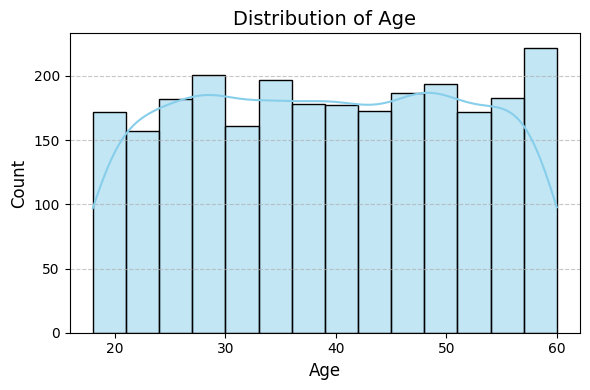


📊 Descriptive Stats for Age:

count    2556.000000
mean       39.043036
std        12.260596
min        18.000000
25%        28.000000
50%        39.000000
75%        50.000000
max        60.000000
Name: Age, dtype: float64 
----------------------------------------


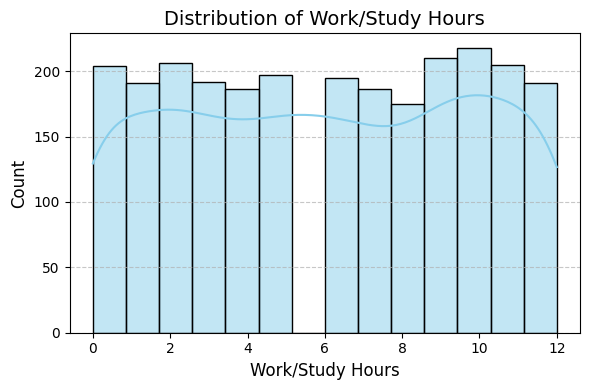


📊 Descriptive Stats for Work/Study Hours:

count    2556.000000
mean        6.023865
std         3.771743
min         0.000000
25%         3.000000
50%         6.000000
75%         9.000000
max        12.000000
Name: Work/Study Hours, dtype: float64 
----------------------------------------


In [13]:
# ===== Visualize Distribution of Numerical Features =====

num_feats = ['Age', 'Work/Study Hours']

for col in num_feats:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    # Print descriptive statistics
    print(f'\n📊 Descriptive Stats for {col}:\n')
    print(df[col].describe(), '\n' + '-'*40)

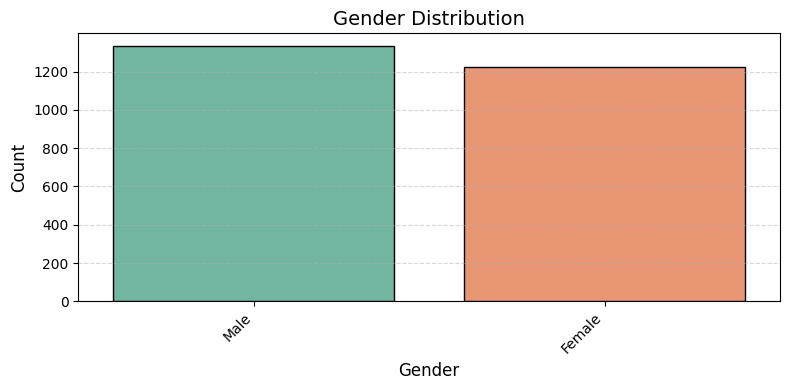


📊 Proportion of Each Category in "Gender":

Gender
Male      0.522
Female    0.478
Name: proportion, dtype: float64 
----------------------------------------


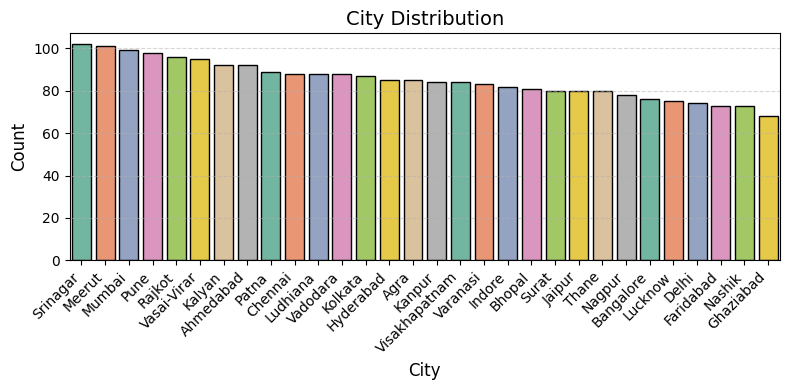


📊 Proportion of Each Category in "City":

City
Srinagar         0.040
Meerut           0.040
Mumbai           0.039
Pune             0.038
Rajkot           0.038
Vasai-Virar      0.037
Kalyan           0.036
Ahmedabad        0.036
Patna            0.035
Chennai          0.034
Ludhiana         0.034
Vadodara         0.034
Kolkata          0.034
Hyderabad        0.033
Agra             0.033
Kanpur           0.033
Visakhapatnam    0.033
Varanasi         0.032
Indore           0.032
Bhopal           0.032
Surat            0.031
Jaipur           0.031
Thane            0.031
Nagpur           0.031
Bangalore        0.030
Lucknow          0.029
Delhi            0.029
Faridabad        0.029
Nashik           0.029
Ghaziabad        0.027
Name: proportion, dtype: float64 
----------------------------------------


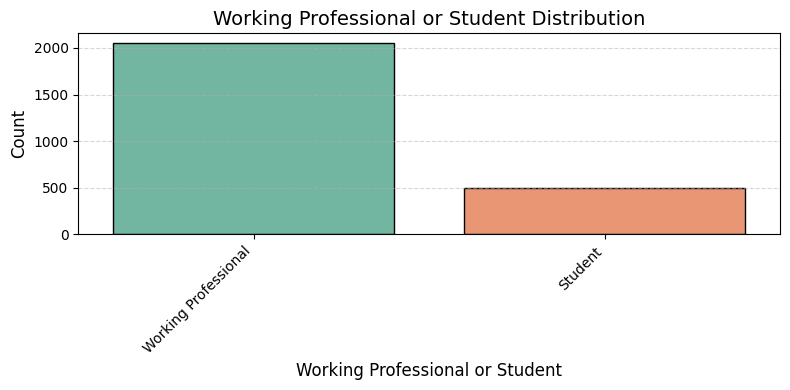


📊 Proportion of Each Category in "Working Professional or Student":

Working Professional or Student
Working Professional    0.804
Student                 0.196
Name: proportion, dtype: float64 
----------------------------------------


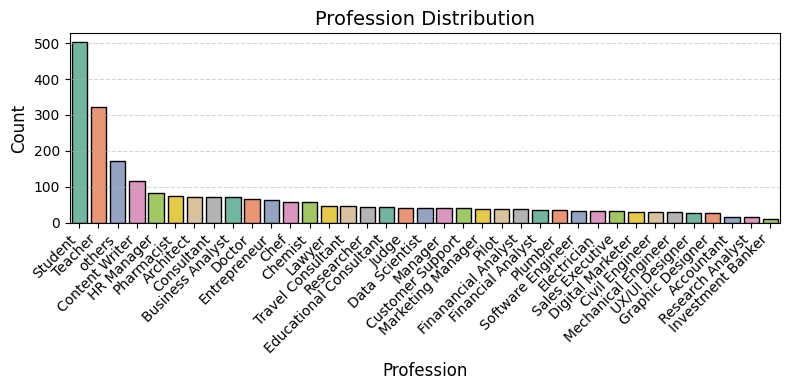


📊 Proportion of Each Category in "Profession":

Profession
Student                   0.196
Teacher                   0.126
others                    0.067
Content Writer            0.045
HR Manager                0.033
Pharmacist                0.029
Architect                 0.029
Consultant                0.028
Business Analyst          0.028
Doctor                    0.026
Entrepreneur              0.025
Chef                      0.023
Chemist                   0.023
Lawyer                    0.019
Travel Consultant         0.018
Researcher                0.018
Educational Consultant    0.017
Judge                     0.016
Data Scientist            0.016
Manager                   0.016
Customer Support          0.016
Marketing Manager         0.015
Pilot                     0.015
Finanancial Analyst       0.015
Financial Analyst         0.014
Plumber                   0.014
Software Engineer         0.013
Electrician               0.013
Sales Executive           0.013
Digital Mark

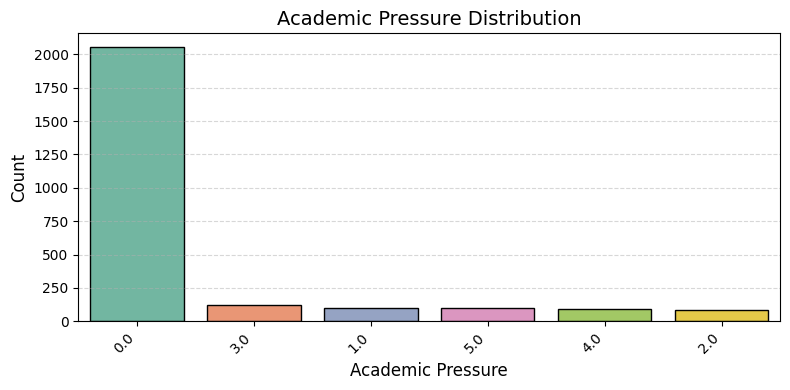


📊 Proportion of Each Category in "Academic Pressure":

Academic Pressure
0.0    0.804
3.0    0.049
1.0    0.039
5.0    0.038
4.0    0.036
2.0    0.034
Name: proportion, dtype: float64 
----------------------------------------


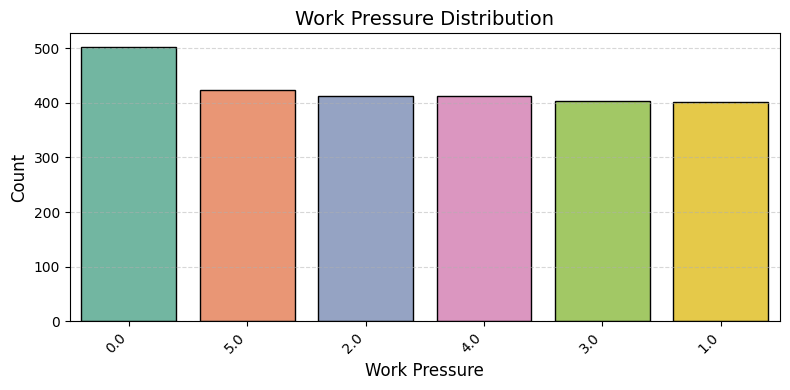


📊 Proportion of Each Category in "Work Pressure":

Work Pressure
0.0    0.196
5.0    0.166
2.0    0.162
4.0    0.161
3.0    0.158
1.0    0.157
Name: proportion, dtype: float64 
----------------------------------------


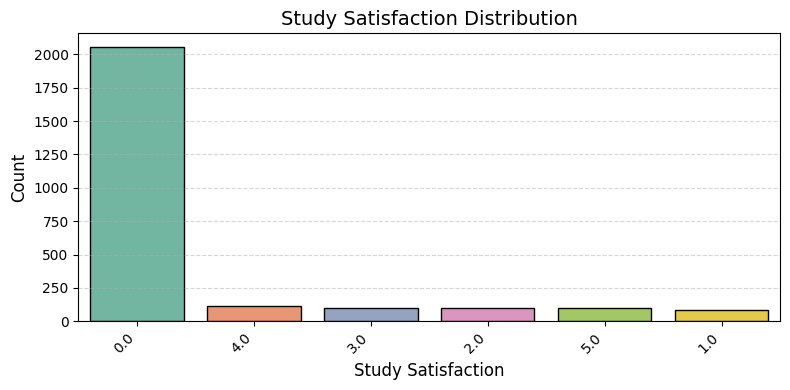


📊 Proportion of Each Category in "Study Satisfaction":

Study Satisfaction
0.0    0.804
4.0    0.045
3.0    0.040
2.0    0.039
5.0    0.038
1.0    0.034
Name: proportion, dtype: float64 
----------------------------------------


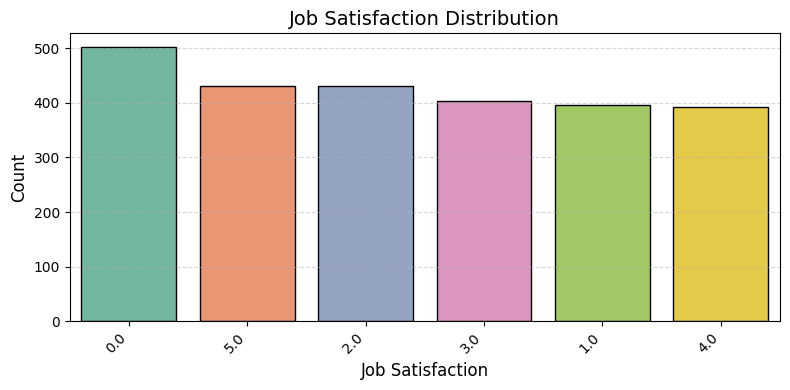


📊 Proportion of Each Category in "Job Satisfaction":

Job Satisfaction
0.0    0.196
5.0    0.169
2.0    0.169
3.0    0.158
1.0    0.155
4.0    0.153
Name: proportion, dtype: float64 
----------------------------------------


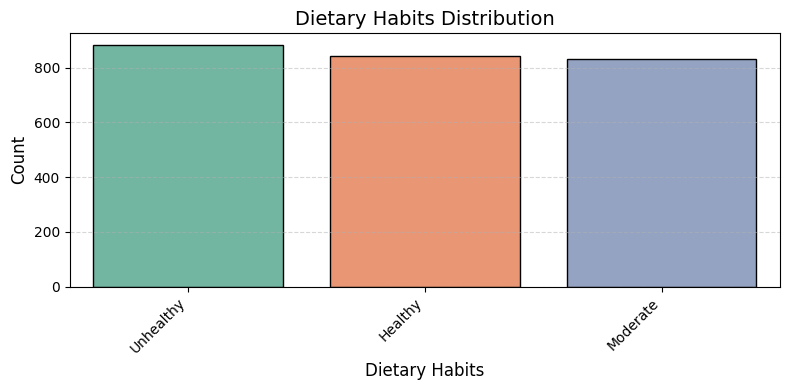


📊 Proportion of Each Category in "Dietary Habits":

Dietary Habits
Unhealthy    0.345
Healthy      0.329
Moderate     0.326
Name: proportion, dtype: float64 
----------------------------------------


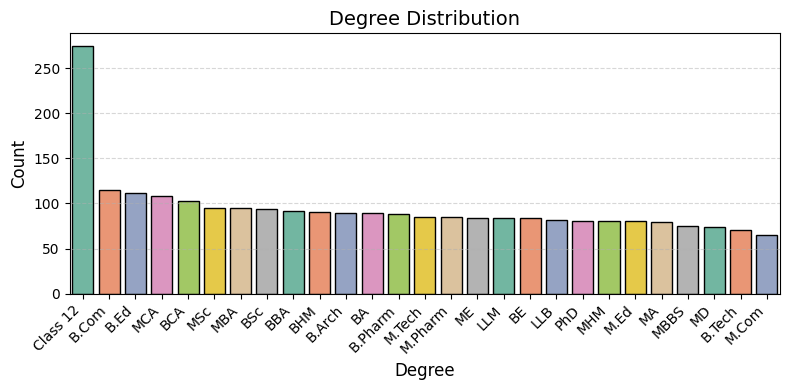


📊 Proportion of Each Category in "Degree":

Degree
Class 12    0.108
B.Com       0.045
B.Ed        0.044
MCA         0.042
BCA         0.040
MSc         0.037
MBA         0.037
BSc         0.037
BBA         0.036
BHM         0.035
B.Arch      0.035
BA          0.035
B.Pharm     0.034
M.Tech      0.033
M.Pharm     0.033
ME          0.033
LLM         0.033
BE          0.033
LLB         0.032
PhD         0.032
MHM         0.032
M.Ed        0.032
MA          0.031
MBBS        0.029
MD          0.029
B.Tech      0.028
M.Com       0.025
Name: proportion, dtype: float64 
----------------------------------------


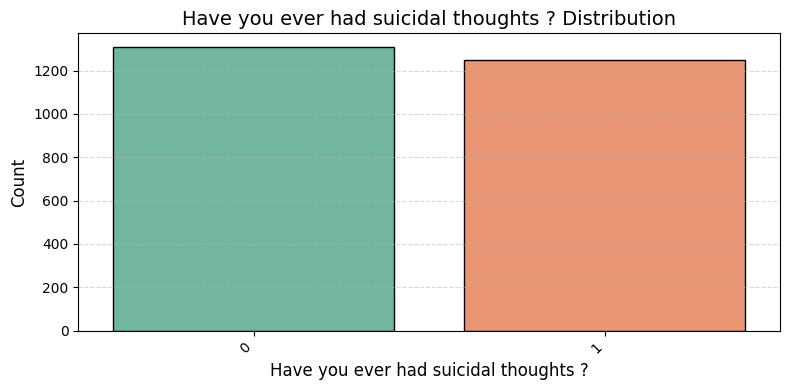


📊 Proportion of Each Category in "Have you ever had suicidal thoughts ?":

Have you ever had suicidal thoughts ?
0    0.511
1    0.489
Name: proportion, dtype: float64 
----------------------------------------


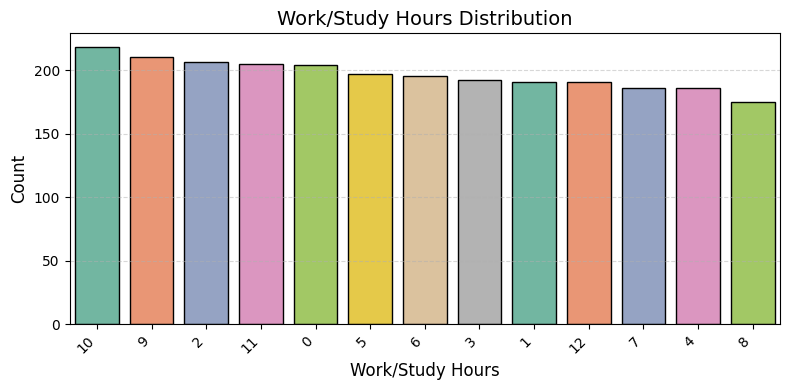


📊 Proportion of Each Category in "Work/Study Hours":

Work/Study Hours
10    0.085
9     0.082
2     0.081
11    0.080
0     0.080
5     0.077
6     0.076
3     0.075
1     0.075
12    0.075
7     0.073
4     0.073
8     0.068
Name: proportion, dtype: float64 
----------------------------------------


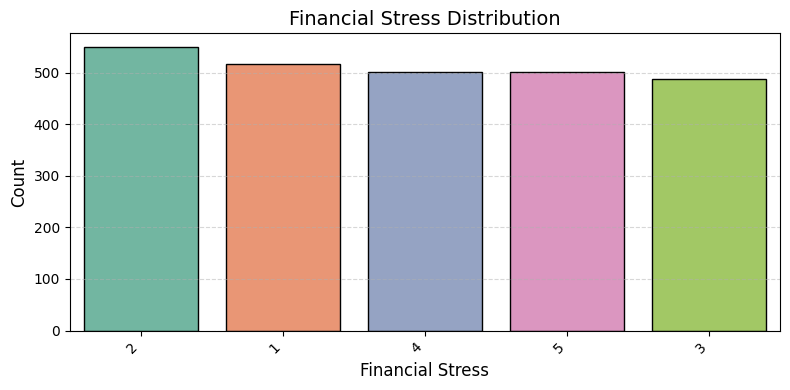


📊 Proportion of Each Category in "Financial Stress":

Financial Stress
2    0.215
1    0.202
4    0.196
5    0.196
3    0.191
Name: proportion, dtype: float64 
----------------------------------------


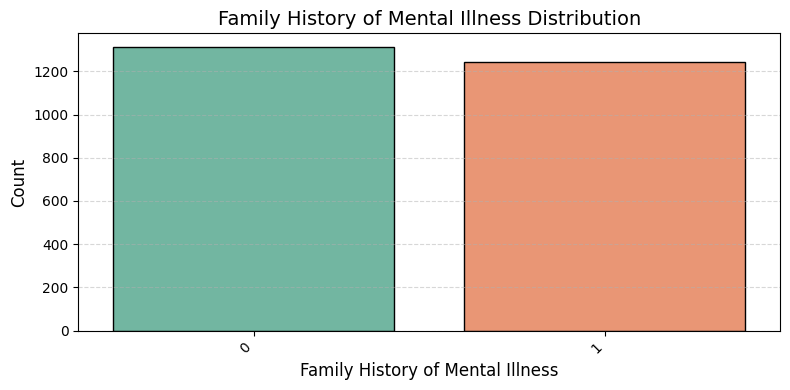


📊 Proportion of Each Category in "Family History of Mental Illness":

Family History of Mental Illness
0    0.513
1    0.487
Name: proportion, dtype: float64 
----------------------------------------


In [14]:
# ===== Visualize Distribution of Categorical Features =====

cat_feats = [
    'Gender', 'City', 'Working Professional or Student', 'Profession',
    'Academic Pressure', 'Work Pressure', 'Study Satisfaction',
    'Job Satisfaction', 'Dietary Habits', 'Degree',
    'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
    'Financial Stress', 'Family History of Mental Illness'
]

for col in cat_feats:
    plt.figure(figsize=(8, 4))
    sns.countplot(
        data=df,
        x=col,
        order=df[col].value_counts().index,
        palette='Set2',
        edgecolor='black'
    )
    plt.title(f'{col} Distribution', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

    print(f'\n📊 Proportion of Each Category in "{col}":\n')
    print(df[col].value_counts(normalize=True).round(3), '\n' + '-'*40)

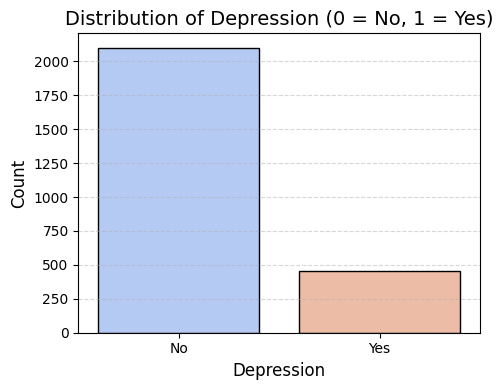


📊 Depression Value Counts (Proportions):
Depression
No     0.822
Yes    0.178
Name: proportion, dtype: float64


In [15]:
# ===== Target Variable Distribution =====

plt.figure(figsize=(5, 4))
sns.countplot(data=df, x='Depression', palette='coolwarm', edgecolor='black')
plt.title('Distribution of Depression (0 = No, 1 = Yes)', fontsize=14)
plt.xlabel('Depression', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Display normalized value counts (as proportions)
print("\n📊 Depression Value Counts (Proportions):")
print(df['Depression'].value_counts(normalize=True).rename({0: 'No', 1: 'Yes'}).round(3))

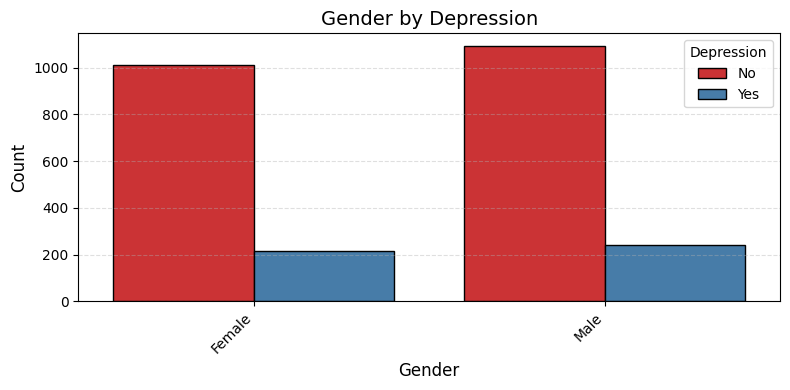

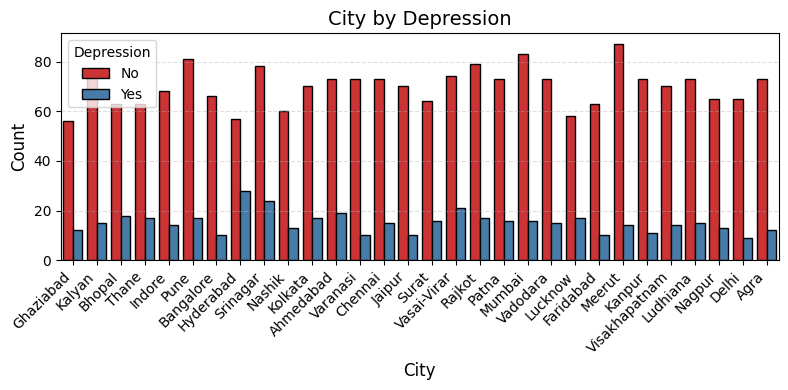

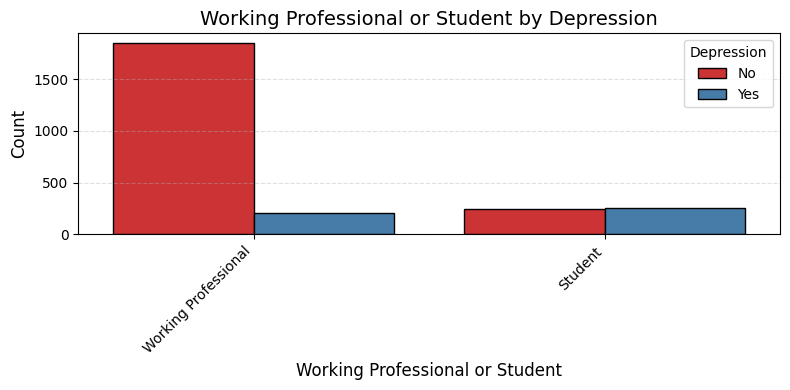

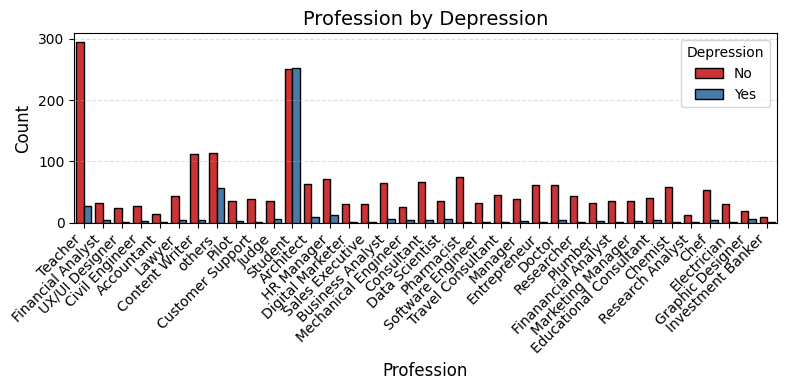

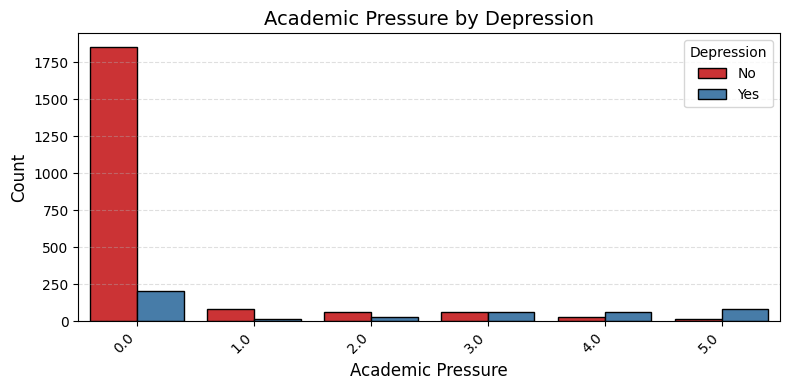

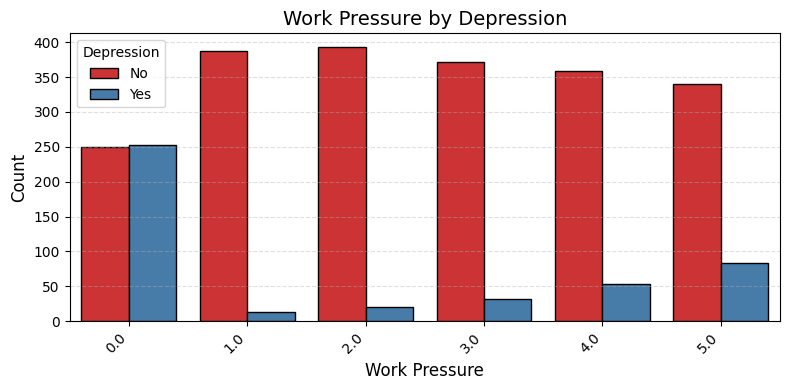

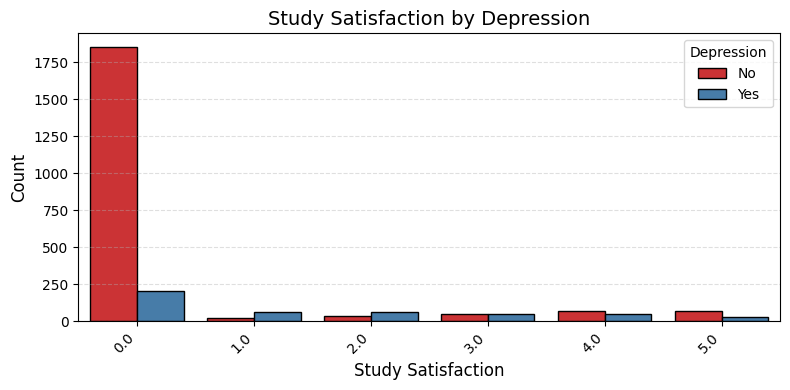

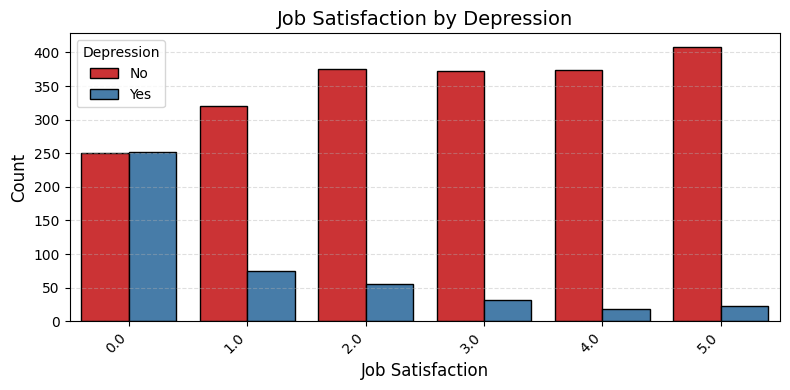

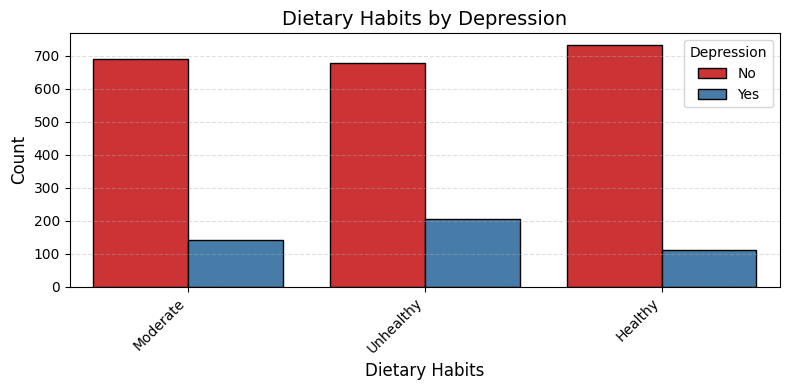

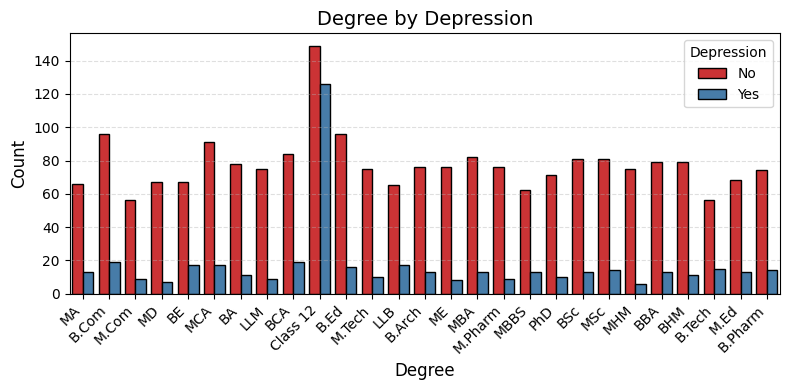

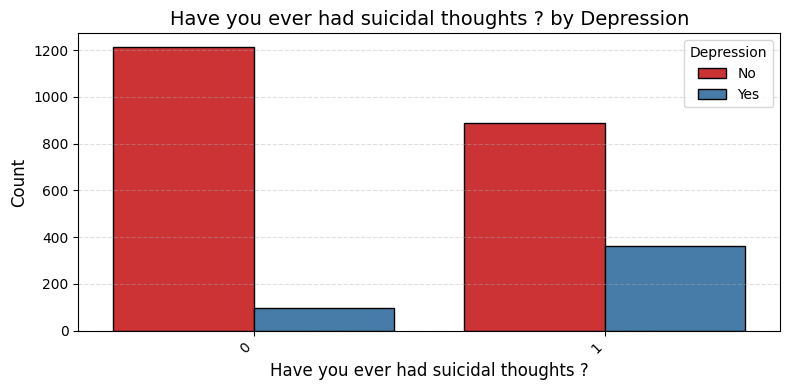

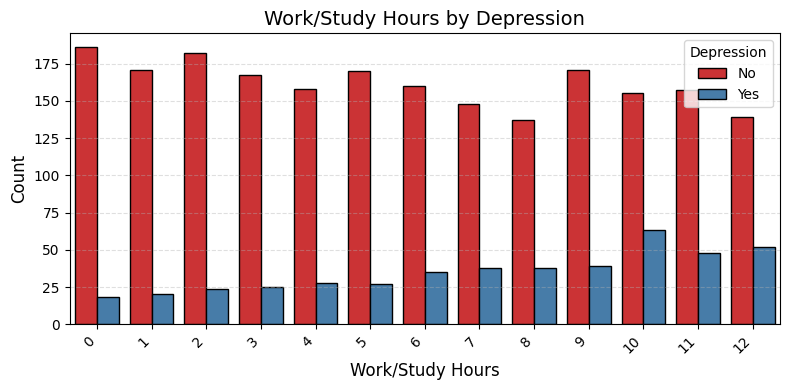

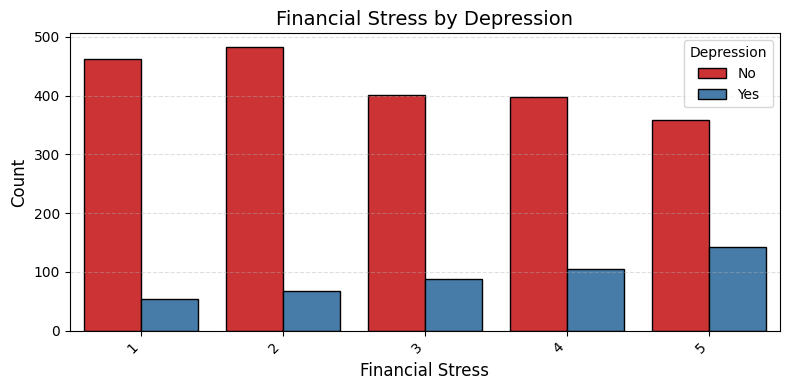

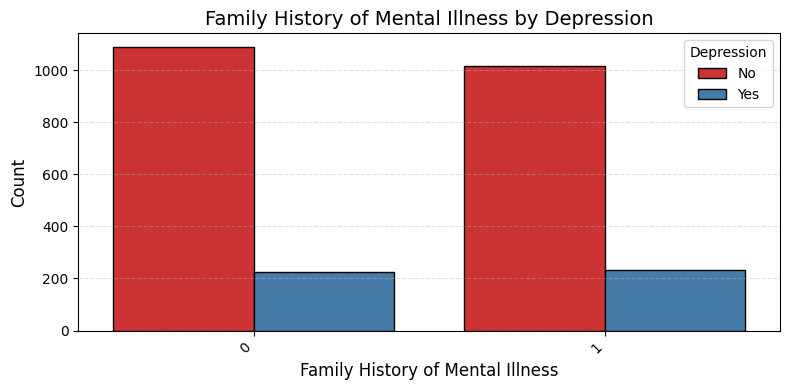

In [16]:
# ===== Categorical Feature Distributions by Depression Label =====

for col in cat_feats:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, hue='Depression', palette='Set1', edgecolor='black')
    plt.title(f'{col} by Depression', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Depression', labels=['No', 'Yes'])
    plt.grid(axis='y', linestyle='--', alpha=0.4)
    plt.tight_layout()
    plt.show()

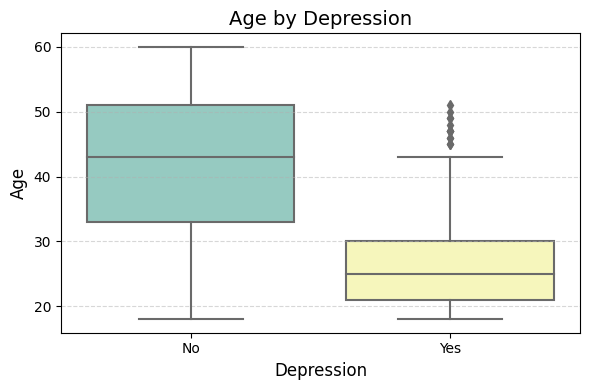

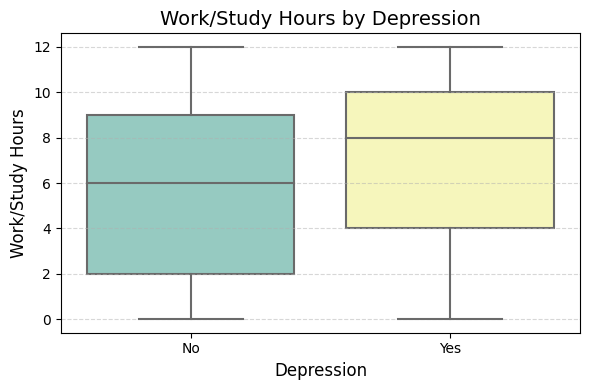

In [17]:
# ===== Numerical Feature Distributions by Depression Label (Boxplots) =====

for col in num_feats:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, x='Depression', y=col, palette='Set3')
    plt.title(f'{col} by Depression', fontsize=14)
    plt.xlabel('Depression', fontsize=12)
    plt.ylabel(col, fontsize=12)
    plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

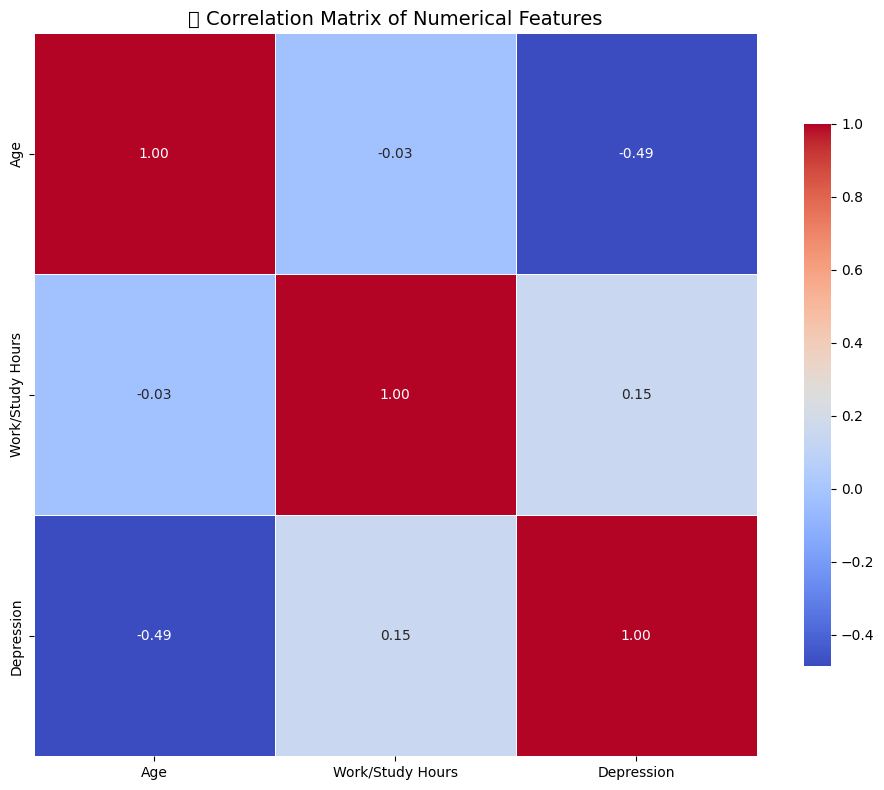

In [18]:
# ===== Correlation Matrix for Numerical Features =====
plt.figure(figsize=(10, 8))
sns.heatmap(
    df[num_feats + ['Depression']].corr(),
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    linewidths=0.5,
    square=True,
    cbar_kws={'shrink': 0.75}
)
plt.title('🔗 Correlation Matrix of Numerical Features', fontsize=14)
plt.tight_layout()
plt.show()

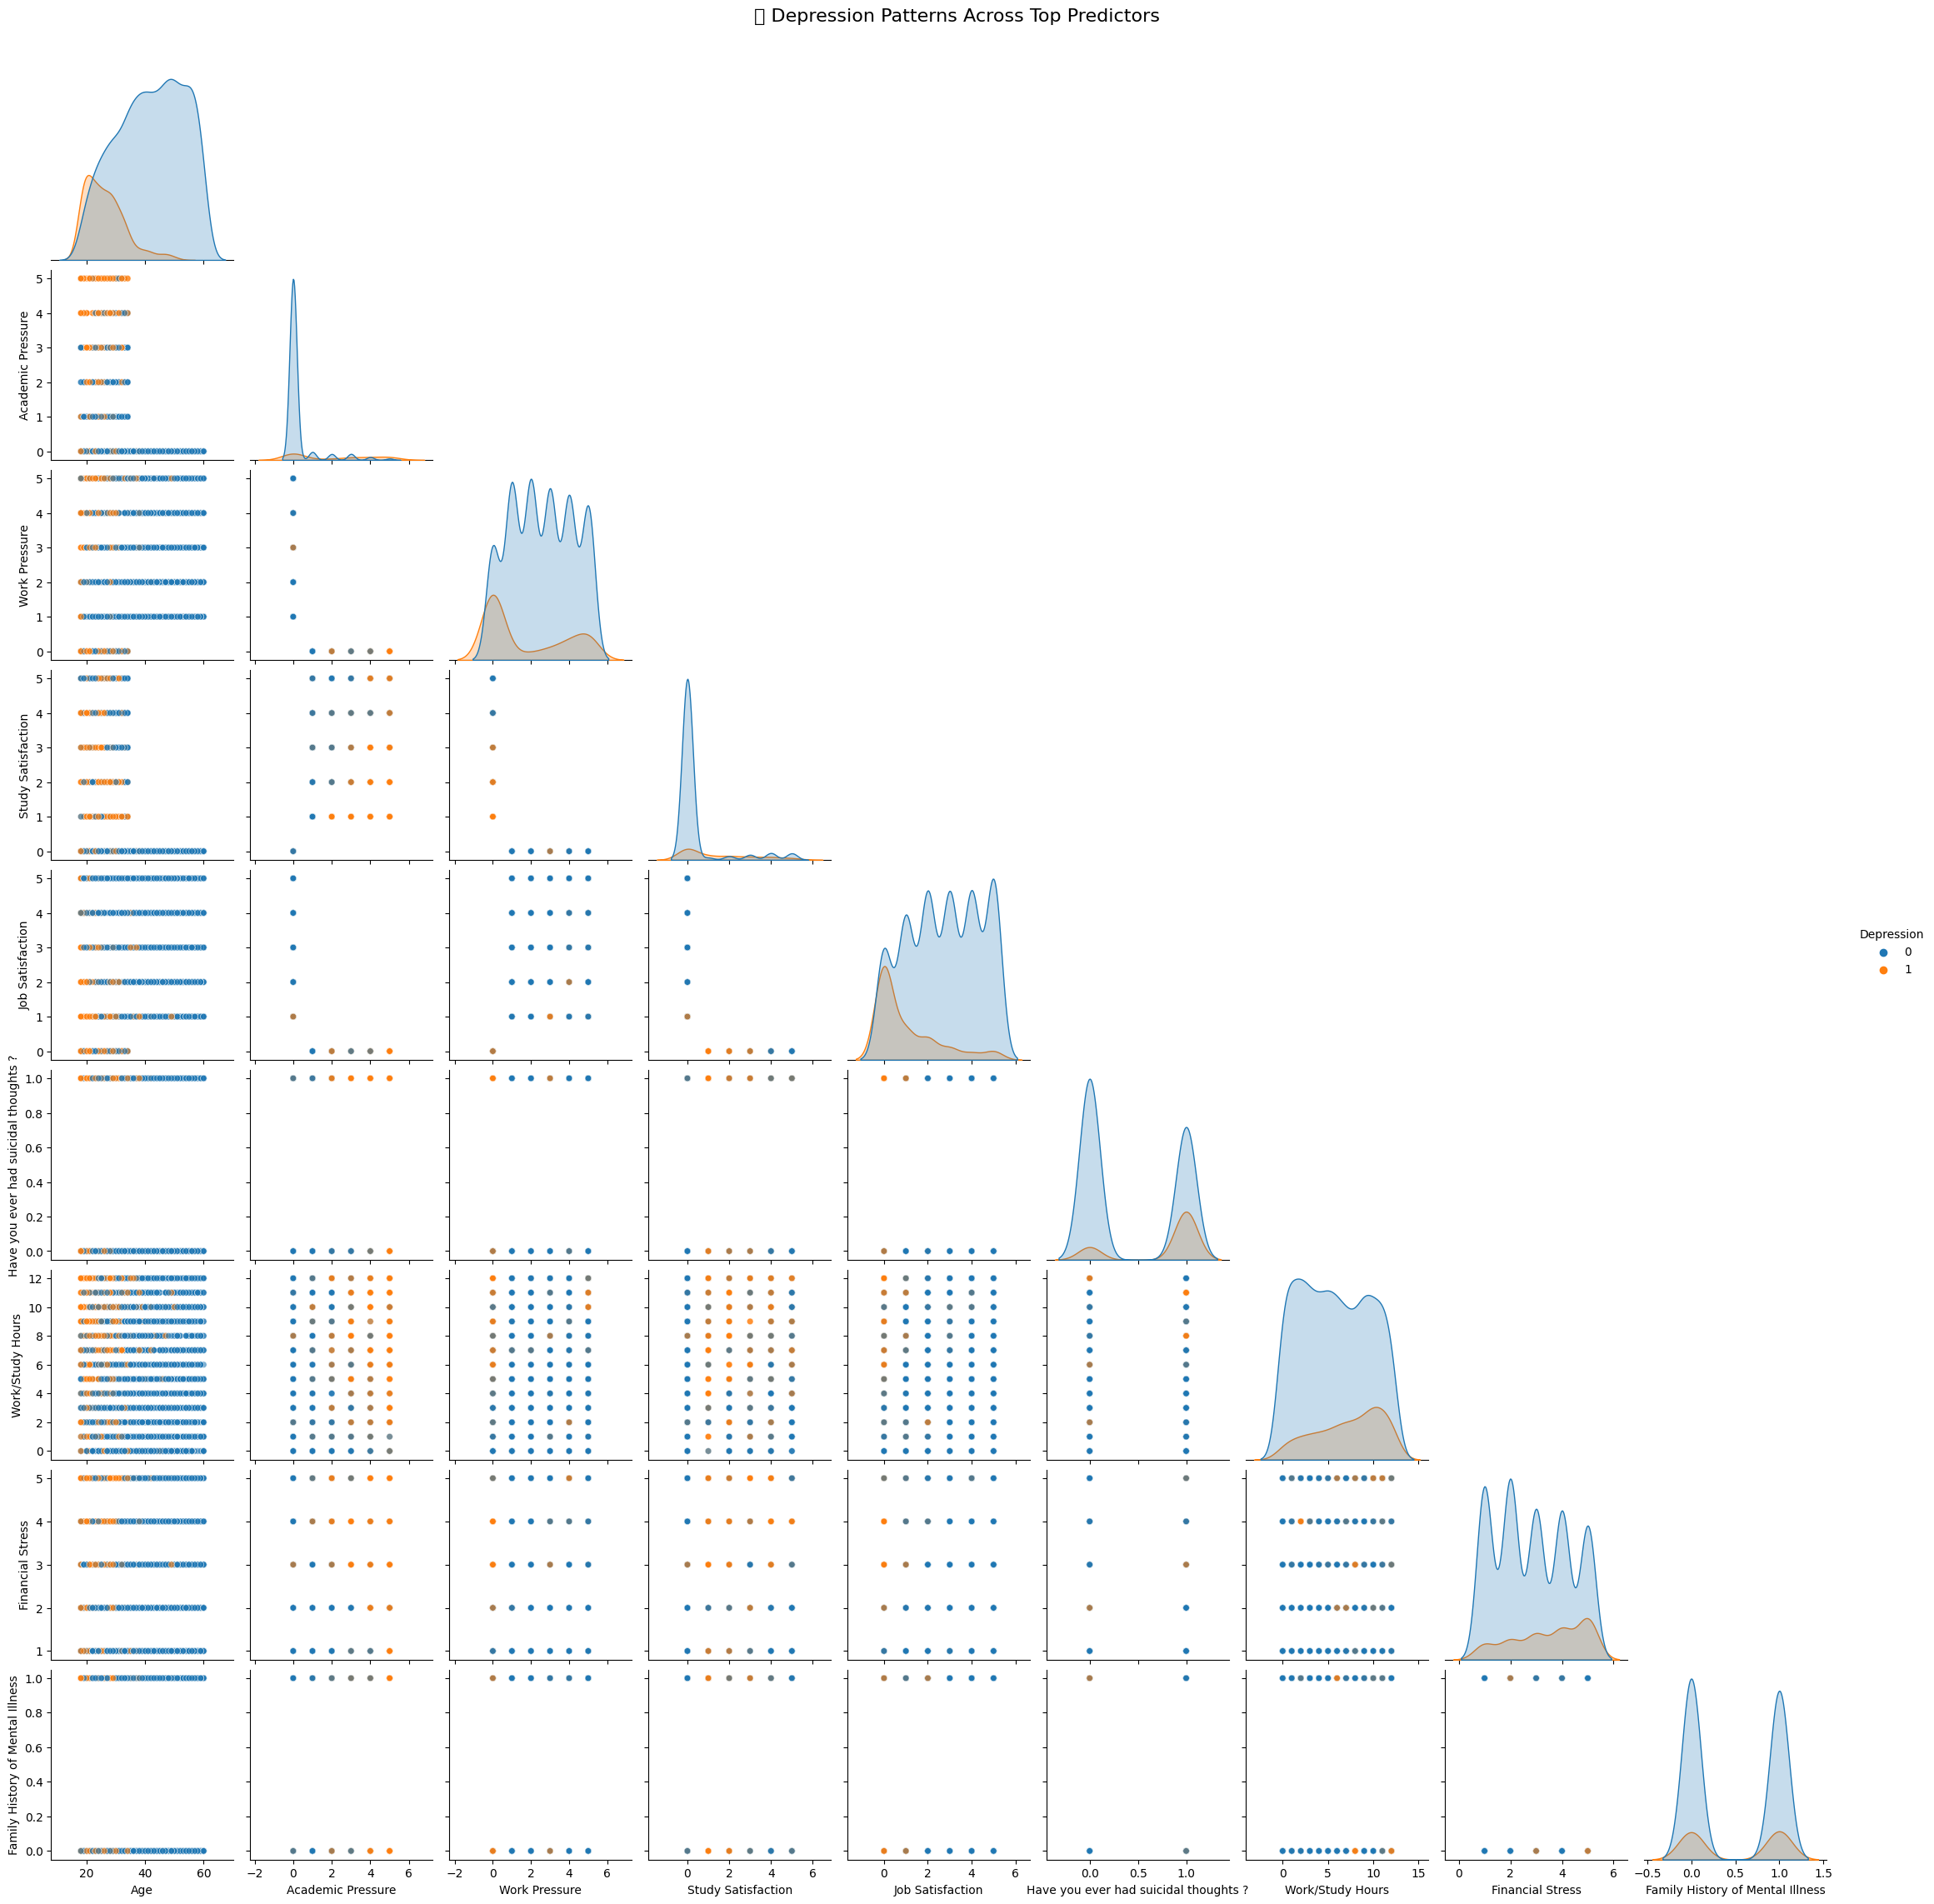

In [19]:
# ===== Pairplot of Top Predictors by Depression Label =====

top_preds = [
    'Age', 'Working Professional or Student', 'Profession',
    'Academic Pressure', 'Work Pressure', 'Study Satisfaction',
    'Job Satisfaction', 'Sleep Duration', 'Dietary Habits', 'Degree',
    'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
    'Financial Stress', 'Family History of Mental Illness', 'Depression'
]

sns.pairplot(df[top_preds], hue='Depression', corner=True, diag_kind='kde', plot_kws={'alpha': 0.6, 's': 30})
plt.suptitle('🧠 Depression Patterns Across Top Predictors', fontsize=16, y=1.02)
plt.show()

# Feature Engineering & Encoding

In [20]:
# 🎯 Combine Related Features to Simplify Model Inputs
df['Work/Academic Pressure'] = df['Work Pressure'] + df['Academic Pressure']
df['Job/Study Satisfaction'] = df['Job Satisfaction'] + df['Study Satisfaction']

# ❌ Drop individual components after combining
df.drop(['Study Satisfaction', 'Job Satisfaction', 'Academic Pressure', 'Work Pressure'], axis=1, inplace=True)

# 🔄 Encode Binary Categorical Feature: Gender
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# 📊 Bucketize Age into Categories
df.loc[df['Age'] <= 26.4, 'Age'] = 0
df.loc[(df['Age'] > 26.4) & (df['Age'] <= 34.8), 'Age'] = 1
df.loc[(df['Age'] > 34.8) & (df['Age'] <= 43.2), 'Age'] = 2
df.loc[(df['Age'] > 43.2) & (df['Age'] <= 51.6), 'Age'] = 3
df.loc[df['Age'] > 51.6, 'Age'] = 4

# 🔧 Ensure Age is Integer Type
df['Age'] = df['Age'].astype(int)

# 🔄 Encode Role: Working Professional or Student
df['Working Professional or Student'] = df['Working Professional or Student'].map({'Working Professional': 0, 'Student': 1})

# Features and Target

In [21]:
X = df.drop(['Depression'], axis=1)
y = df['Depression']

# Split Train/Test

In [22]:
# 📂 Train-Test Split with Stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.1,           # Use 10% of the data for testing
    stratify=y,              # Maintain class balance in both sets
    random_state=SEED        # For reproducibility
)

In [23]:
# 🔣 Categorical Columns to Encode
cat_cols = ['Profession', 'Sleep Duration', 'Dietary Habits', 'Gender', 'City', 'Degree']

# 🎯 Initialize and Fit Target Encoder
te = TargetEncoder(cols=cat_cols, smoothing=5.0)
te.fit(X_train, y_train)  # Fit only on training data to prevent data leakage

# 🚀 Apply Encoding to Train and Test
X_train = te.transform(X_train)
X_test = te.transform(X_test)

In [24]:
# 🔢 Final Input Shape for ML or Neural Networks
input_dim = X_train.shape[1]

# Machine Learning

In [25]:
# Count the number of samples for each class in the training set
counter = Counter(y_train)

# Calculate the total number of samples
total = sum(counter.values())

# Compute class weights to handle class imbalance
# Formula: weight for class = total samples / (number of classes * samples in that class)
class_weights = {cls: total / (len(counter) * count) for cls, count in counter.items()}

# Print the calculated class weights
print(class_weights)

{0: 0.6081438392384981, 1: 2.8117359413202934}


In [26]:
# Initialize the CatBoostClassifier with specific hyperparameters and class weights
model = CatBoostClassifier(
    iterations=500,                  # Number of boosting iterations (trees)
    learning_rate=0.1,              # Step size shrinkage to prevent overfitting
    depth=6,                       # Maximum depth of the trees
    class_weights={                # Handle class imbalance by assigning higher weight to minority class
        0: 0.6081438392384981,     # Weight for class 0
        1: 2.8117359413202934      # Weight for class 1
    },
    eval_metric='AUC',             # Evaluation metric to optimize (Area Under ROC Curve)
    verbose=100                   # Print training info every 100 iterations
)

0:	total: 56.9ms	remaining: 28.4s
100:	total: 199ms	remaining: 788ms
200:	total: 341ms	remaining: 507ms
300:	total: 480ms	remaining: 317ms
400:	total: 619ms	remaining: 153ms
499:	total: 750ms	remaining: 0us
0:	total: 1.89ms	remaining: 946ms
100:	total: 166ms	remaining: 654ms
200:	total: 315ms	remaining: 468ms
300:	total: 455ms	remaining: 301ms
400:	total: 596ms	remaining: 147ms
499:	total: 723ms	remaining: 0us
0:	total: 1.63ms	remaining: 814ms
100:	total: 151ms	remaining: 595ms
200:	total: 301ms	remaining: 448ms
300:	total: 442ms	remaining: 292ms
400:	total: 575ms	remaining: 142ms
499:	total: 703ms	remaining: 0us
0:	total: 1.55ms	remaining: 773ms
100:	total: 150ms	remaining: 591ms
200:	total: 290ms	remaining: 431ms
300:	total: 449ms	remaining: 297ms
400:	total: 599ms	remaining: 148ms
499:	total: 726ms	remaining: 0us
0:	total: 1.54ms	remaining: 768ms
100:	total: 143ms	remaining: 566ms
200:	total: 290ms	remaining: 432ms
300:	total: 429ms	remaining: 284ms
400:	total: 567ms	remaining: 140m

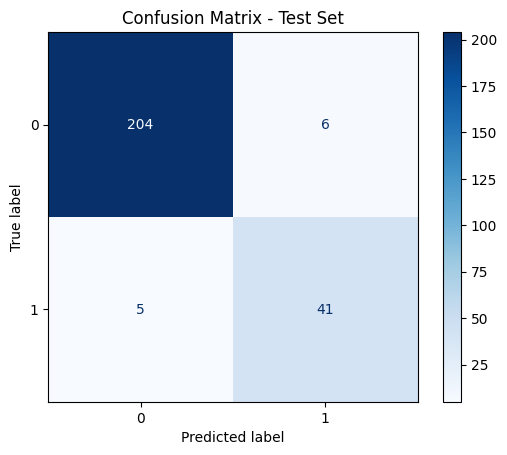


📊 Feature Importances:
                                  Feature  Importance
1                                     Age   20.519818
8   Have you ever had suicidal thoughts ?   13.996857
12                 Work/Academic Pressure   12.663165
13                 Job/Study Satisfaction    8.836977
9                        Work/Study Hours    8.177046
10                       Financial Stress    7.801267
4                              Profession    5.853622
6                          Dietary Habits    4.599178
7                                  Degree    4.044650
5                          Sleep Duration    3.820886
2                                    City    3.518857
11       Family History of Mental Illness    3.196701
3         Working Professional or Student    1.792199
0                                  Gender    1.178776


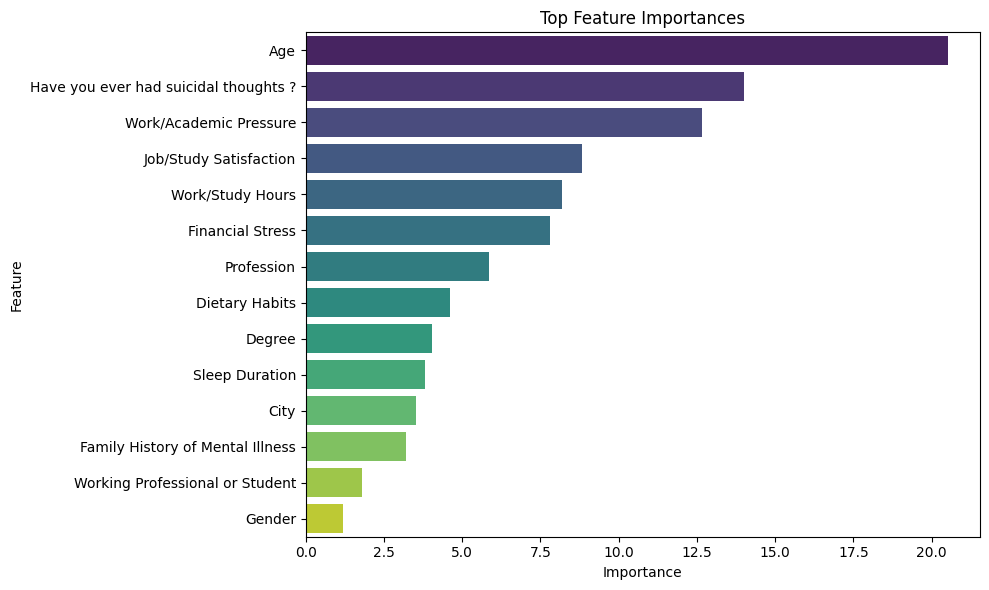

In [27]:
# Set up stratified 10-fold cross-validation to maintain class balance in folds
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Evaluate model performance with cross-validation for accuracy and weighted F1 score
cv_accuracy_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')
cv_f1_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='f1_weighted')

# Print cross-validation results
print("🔍 Cross-Validation Accuracy Scores:", cv_accuracy_scores)
print("✅ Mean CV Accuracy:", cv_accuracy_scores.mean())
print("📉 Standard Deviation of CV Accuracy:", cv_accuracy_scores.std())

print("🔍 Cross-Validation F1 Scores:", cv_f1_scores)
print("✅ Mean CV F1 Score:", cv_f1_scores.mean())
print("📉 Standard Deviation of CV F1 Score:", cv_f1_scores.std())

# Train the model on the full training dataset
model.fit(X_train, y_train)

# Predict labels for the test set
y_pred = model.predict(X_test)

# Calculate accuracy and weighted F1 score on the test set
test_accuracy = accuracy_score(y_test, y_pred)
test_f1 = f1_score(y_test, y_pred, average='weighted')

print("\n🧪 Test Set Accuracy:", test_accuracy)
print("🧪 Test Set F1 Score:", test_f1)

# Display detailed classification report with four decimal places
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred, digits=4))

# Generate and plot the confusion matrix for the test set predictions
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Test Set")
plt.show()

# === Feature Importance Analysis === #
# Check if the model provides feature importance (only for compatible models)
if hasattr(model, 'feature_importances_'):
    importances = model.feature_importances_
    feature_names = X_train.columns  # Ensure X_train is a DataFrame to get column names
    
    # Create a DataFrame for feature importances sorted descending
    feature_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False)

    print("\n📊 Feature Importances:")
    print(feature_importance_df)

    # Visualize feature importances as a horizontal bar plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
    plt.title('Top Feature Importances')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.tight_layout()
    plt.show()

else:
    print("⚠️ The model does not support feature importances directly.")

# Thanks 